# Linear Discriminant Analysis: Group Review
# Quality: 345678, Outliers: NONE

## Set Working Directory

## Import Packages

In [26]:
library("tidyr")
library("corrplot")
library("MASS")
library("ggplot2")
library("tibble")
library("reshape2")

corrplot 0.92 loaded

Warning message:
“package ‘tibble’ was built under R version 4.1.2”

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




## Load in Data

In [27]:
wine <- read.csv("WineQT.csv")
head(wine)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,Id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,1
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,2
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,3
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,4
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,5


### View Structure of the Dataset

In [136]:
str(wine)

'data.frame':	1143 obs. of  13 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 6.7 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.58 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.08 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 1.8 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.097 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 15 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 65 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.28 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.54 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 9.2 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...
 $ Id                  : int  0 1 2 3 4 5 6 7 8 10 ...


## Data Wrangling

### Remove Unnecessary Columns

In [28]:
wine_wrangled <- wine[, c(2,5,8,9,12)]
head(wine_wrangled)

,volatile.acidity,chlorides,density,pH,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.70,0.076,0.9978,3.51,5
2,0.88,0.098,0.9968,3.20,5
3,0.76,0.092,0.9970,3.26,5
4,0.28,0.075,0.9980,3.16,6
5,0.70,0.076,0.9978,3.51,5
6,0.66,0.075,0.9978,3.51,5


## Identify Outliers

### Density

In [29]:
boxplot.stats(wine_wrangled$density)

$stats
[1] 0.992200 0.995570 0.996680 0.997845 1.001000

$n
[1] 1143

$conf
[1] 0.9965737 0.9967863

$out
 [1] 0.99160 0.99160 1.00140 1.00150 1.00150 1.00180 0.99120 1.00220 1.00220
[10] 1.00140 1.00140 1.00320 1.00260 1.00140 1.00315 1.00315 1.00210 1.00210
[19] 0.99170 1.00260 0.99210 0.99154 0.99064 0.99064 1.00289 0.99162 0.99007
[28] 0.99020 0.99157 0.99084 0.99191 1.00369 1.00242 0.99182 1.00242 0.99182

#### Outliers: 36

### Chlorides

In [30]:
boxplot.stats(wine_wrangled$chlorides)

$stats
[1] 0.041 0.070 0.079 0.090 0.119

$n
[1] 1143

$conf
[1] 0.07806532 0.07993468

$out
 [1] 0.341 0.332 0.467 0.178 0.610 0.270 0.039 0.337 0.263 0.611 0.358 0.213
[13] 0.214 0.121 0.128 0.120 0.122 0.122 0.121 0.127 0.152 0.125 0.122 0.200
[25] 0.226 0.250 0.124 0.222 0.039 0.157 0.422 0.034 0.387 0.415 0.157 0.241
[37] 0.190 0.132 0.126 0.038 0.165 0.147 0.012 0.012 0.194 0.132 0.161 0.120
[49] 0.120 0.123 0.123 0.414 0.171 0.178 0.166 0.136 0.132 0.132 0.123 0.123
[61] 0.403 0.137 0.414 0.166 0.168 0.415 0.153 0.415 0.123 0.214 0.169 0.205
[73] 0.205 0.039 0.235 0.230 0.038

#### Outliers: 77

### Volatile Acidity

In [31]:
boxplot.stats(wine_wrangled$volatile.acidity)

$stats
[1] 0.1200 0.3925 0.5200 0.6400 1.0050

$n
[1] 1143

$conf
[1] 0.5084333 0.5315667

$out
 [1] 1.020 1.070 1.330 1.330 1.040 1.090 1.040 1.020 1.035 1.025 1.020 1.580
[13] 1.180 1.040

#### Outliers: 14

### pH

In [32]:
boxplot.stats(wine_wrangled$pH)

$stats
[1] 2.920 3.205 3.310 3.400 3.690

$n
[1] 1143

$conf
[1] 3.300887 3.319113

$out
 [1] 3.90 3.75 2.74 2.88 2.86 3.74 3.72 2.89 2.89 3.90 3.71 2.89 3.78 3.70 3.78
[16] 4.01 2.90 4.01 2.88 3.72

#### Outliers: 20

## Remove Outliers

In [33]:
chloride.Q1 <- quantile(wine_wrangled$chlorides, .25)
chloride.Q3 <- quantile(wine_wrangled$chlorides, .75)
chloride.IQR <- IQR(wine_wrangled$chlorides)

In [34]:
no_outliers_c <- subset(wine_wrangled, wine_wrangled$chlorides > (chloride.Q1 - 1.5*chloride.IQR) & wine_wrangled$chlorides < (chloride.Q3 + 1.5*chloride.IQR))

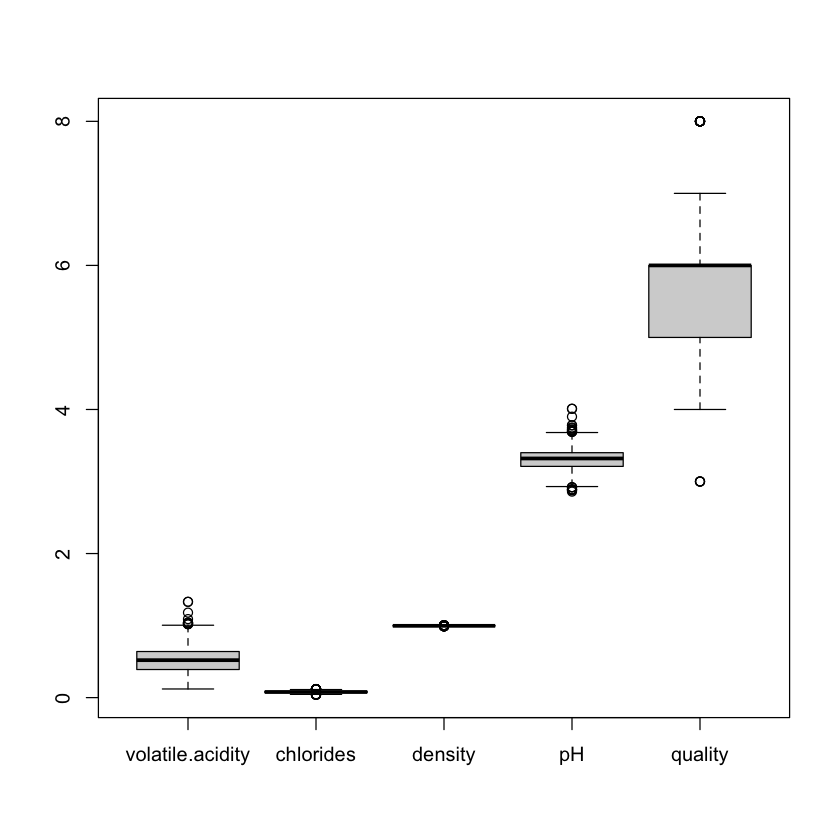

In [35]:
boxplot(no_outliers_c)

### Recheck Outlier Count

In [36]:
boxplot.stats(no_outliers_c$pH)

$stats
[1] 2.93 3.21 3.32 3.40 3.68

$n
[1] 1066

$conf
[1] 3.310805 3.329195

$out
 [1] 3.90 3.75 3.69 3.69 2.88 2.86 3.74 2.92 2.92 3.72 2.89 2.89 2.92 3.71 3.69
[16] 2.89 3.78 3.70 3.78 4.01 4.01 2.88 3.72

In [37]:
boxplot.stats(no_outliers_c$volatile.acidity)

$stats
[1] 0.120 0.390 0.520 0.640 1.005

$n
[1] 1066

$conf
[1] 0.5079019 0.5320981

$out
 [1] 1.020 1.330 1.330 1.040 1.090 1.040 1.020 1.035 1.025 1.020 1.180 1.040

In [38]:
boxplot.stats(no_outliers_c$density)

$stats
[1] 0.992200 0.995530 0.996625 0.997800 1.001000

$n
[1] 1066

$conf
[1] 0.9965151 0.9967349

$out
 [1] 0.99160 0.99160 1.00140 1.00150 1.00150 0.99120 1.00220 1.00220 1.00140
[10] 1.00140 1.00320 1.00260 1.00140 1.00315 1.00315 1.00210 1.00210 0.99170
[19] 1.00260 0.99154 1.00289 0.99162 0.99007 0.99020 0.99157 0.99084 0.99191
[28] 0.99182 0.99182

### Density

In [39]:
density_Q1 <- quantile(no_outliers_c$density, .25)
density_Q3 <- quantile(no_outliers_c$density, .75)
density_IQR <- IQR(no_outliers_c$density)

In [40]:
no_outliers_cd <- subset(no_outliers_c, no_outliers_c$density > (density_Q1 - 1.5*density_IQR) & no_outliers_c$density < (density_Q3 + 1.5*density_IQR))

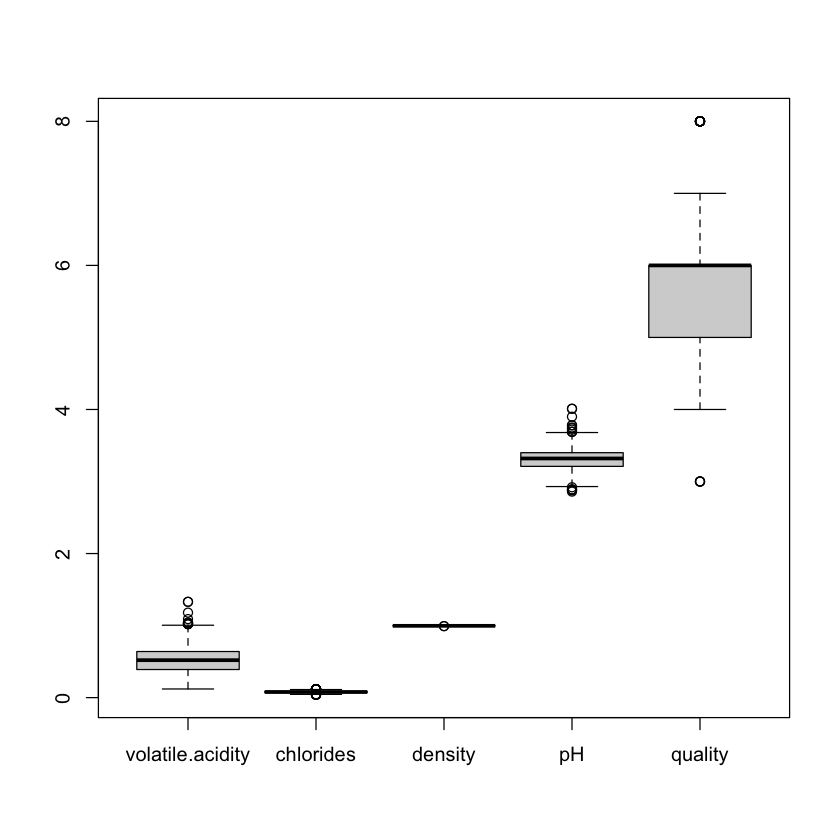

In [41]:
boxplot(no_outliers_cd)

#### Recount Outliers

In [42]:
boxplot.stats(no_outliers_cd$volatile.acidity)

$stats
[1] 0.120 0.390 0.520 0.640 1.005

$n
[1] 1037

$conf
[1] 0.5077339 0.5322661

$out
 [1] 1.020 1.330 1.330 1.040 1.090 1.040 1.020 1.035 1.025 1.020 1.180 1.040

In [43]:
boxplot.stats(no_outliers_cd$pH)

$stats
[1] 2.93 3.21 3.32 3.40 3.68

$n
[1] 1037

$conf
[1] 3.310678 3.329322

$out
 [1] 3.90 3.75 3.69 3.69 2.88 2.86 3.74 2.89 2.89 2.92 3.69 3.78 3.78 4.01 4.01
[16] 2.88 3.72

### pH

In [45]:
ph_Q1 <- quantile(no_outliers_cd$pH, .25)
ph_Q3 <- quantile(no_outliers_cd$pH, .75)
ph_IQR <- IQR(no_outliers_cd$pH)

In [46]:
no_outliers_cdp <- subset(no_outliers_cd, no_outliers_cd$pH > (ph_Q1 - 1.5*ph_IQR) & no_outliers_cd$pH < (ph_Q3 + 1.5*ph_IQR))

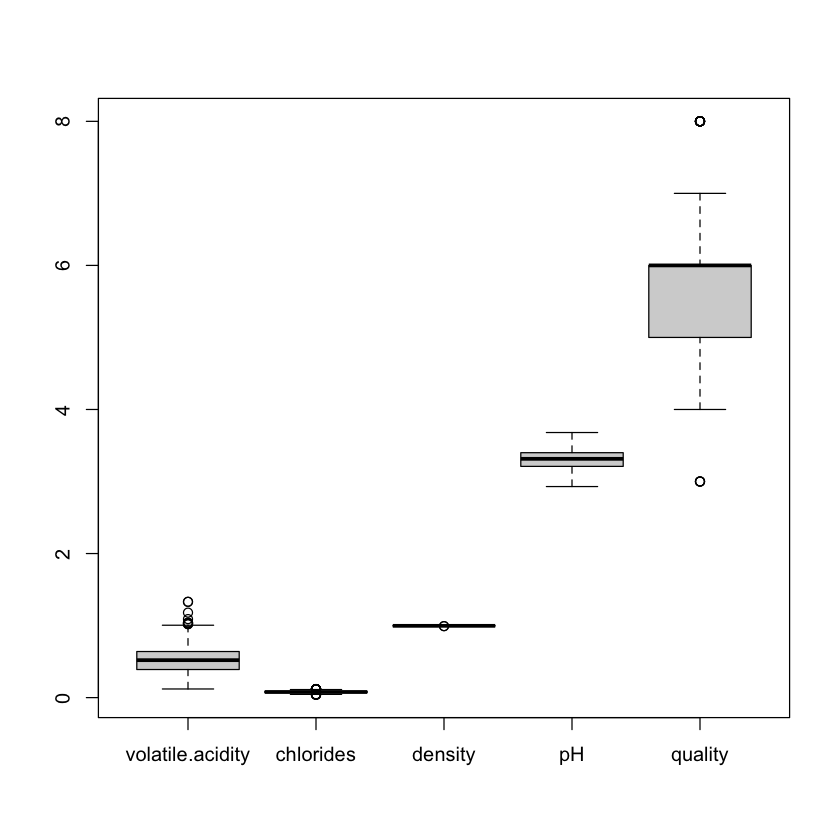

In [47]:
boxplot(no_outliers_cdp)

#### Recount Outliers

In [48]:
boxplot.stats(no_outliers_cdp$volatile.acidity)

$stats
[1] 0.120 0.390 0.520 0.640 1.005

$n
[1] 1020

$conf
[1] 0.5076321 0.5323679

$out
 [1] 1.330 1.330 1.040 1.090 1.020 1.035 1.025 1.020 1.180 1.040

### Volatile Acidity

In [49]:
acid_Q1 <- quantile(no_outliers_cdp$volatile.acidity, .25)
acid_Q3 <- quantile(no_outliers_cdp$volatile.acidity, .75)
acid_IQR <- IQR(no_outliers_cdp$volatile.acidity)

In [50]:
no_outliers <- subset(no_outliers_cdp, no_outliers_cdp$volatile.acidity > (acid_Q1 - 1.5*acid_IQR) & no_outliers_cdp$volatile.acidity < (acid_Q3 + 1.5*acid_IQR))

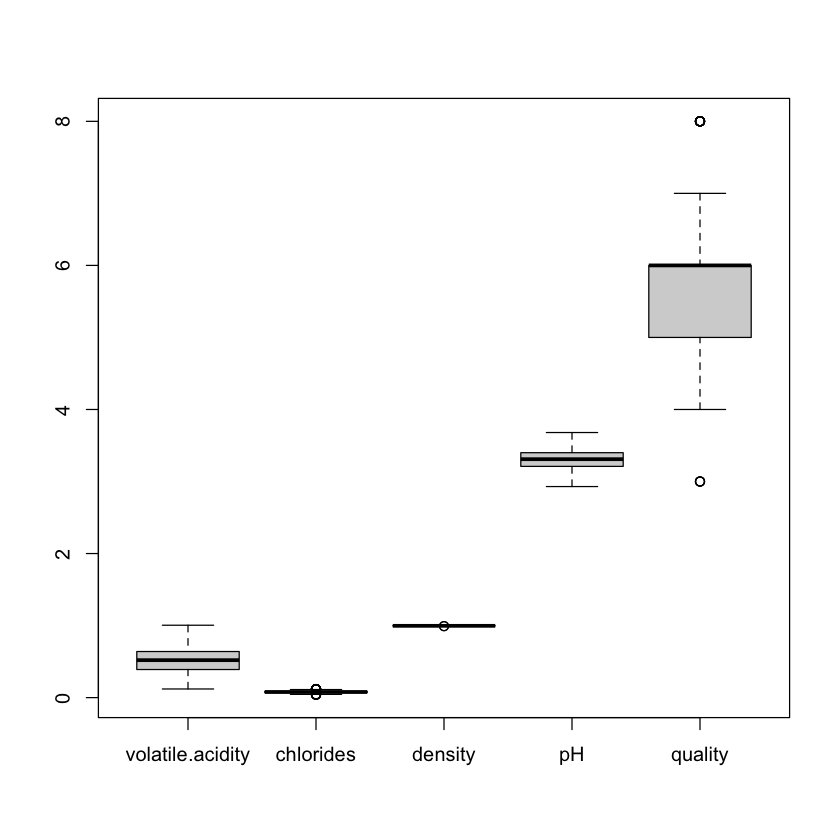

In [52]:
boxplot(no_outliers)

### Summarizing the Dataset

In [53]:
summary(wine_wrangled)

 volatile.acidity   chlorides          density             pH       
 Min.   :0.1200   Min.   :0.01200   Min.   :0.9901   Min.   :2.740  
 1st Qu.:0.3925   1st Qu.:0.07000   1st Qu.:0.9956   1st Qu.:3.205  
 Median :0.5200   Median :0.07900   Median :0.9967   Median :3.310  
 Mean   :0.5313   Mean   :0.08693   Mean   :0.9967   Mean   :3.311  
 3rd Qu.:0.6400   3rd Qu.:0.09000   3rd Qu.:0.9978   3rd Qu.:3.400  
 Max.   :1.5800   Max.   :0.61100   Max.   :1.0037   Max.   :4.010  
    quality     
 Min.   :3.000  
 1st Qu.:5.000  
 Median :6.000  
 Mean   :5.657  
 3rd Qu.:6.000  
 Max.   :8.000  

## Scale the Data: Scale Each Predictor Value

In [54]:
wine_wrangled[1:4] <- scale(wine_wrangled[1:4])

### Find the Mean of Each Predictor Value:  Mean Should == 0
### Find the Standard Deviation of Each Predictor Value:  Standard Deviation Should == 1

In [55]:
apply(wine_wrangled[1:4], 2, mean)
apply(wine_wrangled[1:4], 2, sd)

volatile.acidity        chlorides          density               pH 
   -1.652847e-16    -3.662422e-17     1.039748e-16    -8.347812e-16

volatile.acidity        chlorides          density               pH 
               1                1                1                1

## Create Training and Test Samples

### Making this Example Reproducible

In [56]:
set.seed(1)

### Using 70% of Dataset as Training Set, Remaining 30% as Testing Set

In [57]:
sample <- sample(c(TRUE, FALSE), nrow(wine_wrangled), replace=TRUE, prob=c(0.7,0.3))
train <- wine_wrangled[sample, ]
test <- wine_wrangled[!sample, ]

## Fit LDA Model

In [58]:
model <- lda(quality~., data=train)

### View Model Output

In [59]:
model

Call:
lda(quality ~ ., data = train)

Prior probabilities of groups:
      3       4       5       6       7       8 
0.00375 0.03500 0.41000 0.40375 0.13875 0.00875 

Group means:
  volatile.acidity   chlorides     density          pH
3        1.6162274  0.57969628  0.75127534 -0.13413972
4        0.9389212 -0.17689181 -0.07423699  0.60219472
5        0.3060258  0.06676452  0.17778146 -0.05006982
6       -0.1265455 -0.02660845 -0.06272600  0.08146231
7       -0.7517112 -0.20746900 -0.24422054 -0.17324330
8       -0.2619386 -0.41867761 -0.73859231 -0.56271828

Coefficients of linear discriminants:
                         LD1         LD2        LD3         LD4
volatile.acidity -0.98724052  0.18916601 -0.4664482 -0.07840115
chlorides        -0.16585074 -0.05781727  0.6957015 -0.99078930
density          -0.33540027 -0.01726327  0.7285571  0.74287367
pH               -0.09262148 -1.06106451  0.4185101  0.07261674

Proportion of trace:
   LD1    LD2    LD3    LD4 
0.8629 0.0804 0.0517 0.0

Prior probabilities of group: The proportions of each 'quality' rating in the training set.

Group means: The mean values for each predictor variable for each 'quality' rating.

Coefficients of linear discriminants: Linear combination of predictor variables used to form the decision rule of the LDA model.

### View Model Info

In [60]:
model$counts
model$prior
model$scaling
model$svd

3   4   5   6   7   8 
  3  28 328 323 111   7

3       4       5       6       7       8 
0.00375 0.03500 0.41000 0.40375 0.13875 0.00875

,LD1,LD2,LD3,LD4
volatile.acidity,-0.98724052,0.18916601,-0.4664482,-0.07840115
chlorides,-0.16585074,-0.05781727,0.6957015,-0.99078930
density,-0.33540027,-0.01726327,0.7285571,0.74287367
pH,-0.09262148,-1.06106451,0.4185101,0.07261674


[1] 5.8990682 1.8007533 1.4442519 0.4484159

### Store Model Means

In [61]:
modelmeans <- model$means

### Convert Matrix to a Data Frame

In [62]:
modelmeans <- as.data.frame(modelmeans)
str(modelmeans)

'data.frame':	6 obs. of  4 variables:
 $ volatile.acidity: num  1.616 0.939 0.306 -0.127 -0.752 ...
 $ chlorides       : num  0.5797 -0.1769 0.0668 -0.0266 -0.2075 ...
 $ density         : num  0.7513 -0.0742 0.1778 -0.0627 -0.2442 ...
 $ pH              : num  -0.1341 0.6022 -0.0501 0.0815 -0.1732 ...


### Convert Row Labels to Columns

In [63]:
modelmeans <- tibble::rownames_to_column(modelmeans, "quality")

## Plot Means

### Melt Data Frame

In [64]:
mmodelmeans <- melt(modelmeans, id.vars="quality")

### All Variables on the Same Plot

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warning message in sqrt(sum.squares/one.delta):
“NaNs produced”
Warning message in stats::qt(level/2 + 0.5, pred$df):
“NaNs produced”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warning message in sqrt(sum.squares/one.delta):
“NaNs produced”
Warning message in stats::qt(level/2 + 0.5, pred$df):
“NaNs produced”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warnin

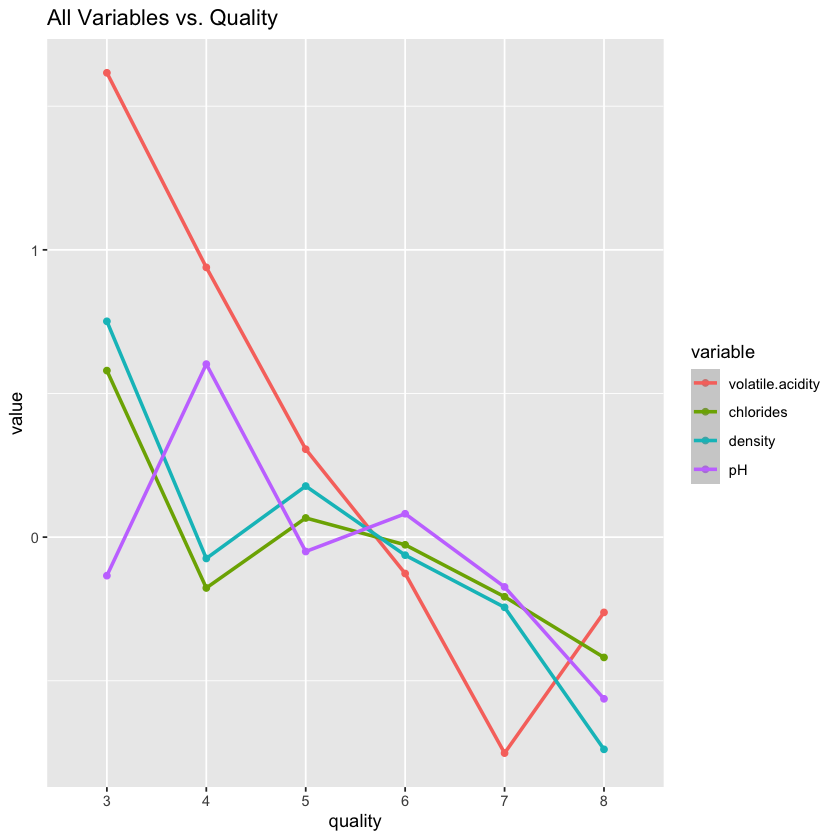

In [65]:
ggplot(mmodelmeans, aes(quality, value, group=variable, col=variable)) + ggtitle("All Variables vs. Quality")+ geom_line() + geom_point() + stat_smooth()

### Variables on Separate Plots

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warning message in sqrt(sum.squares/one.delta):
“NaNs produced”
Warning message in stats::qt(level/2 + 0.5, pred$df):
“NaNs produced”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warning message in sqrt(sum.squares/one.delta):
“NaNs produced”
Warning message in stats::qt(level/2 + 0.5, pred$df):
“NaNs produced”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warnin

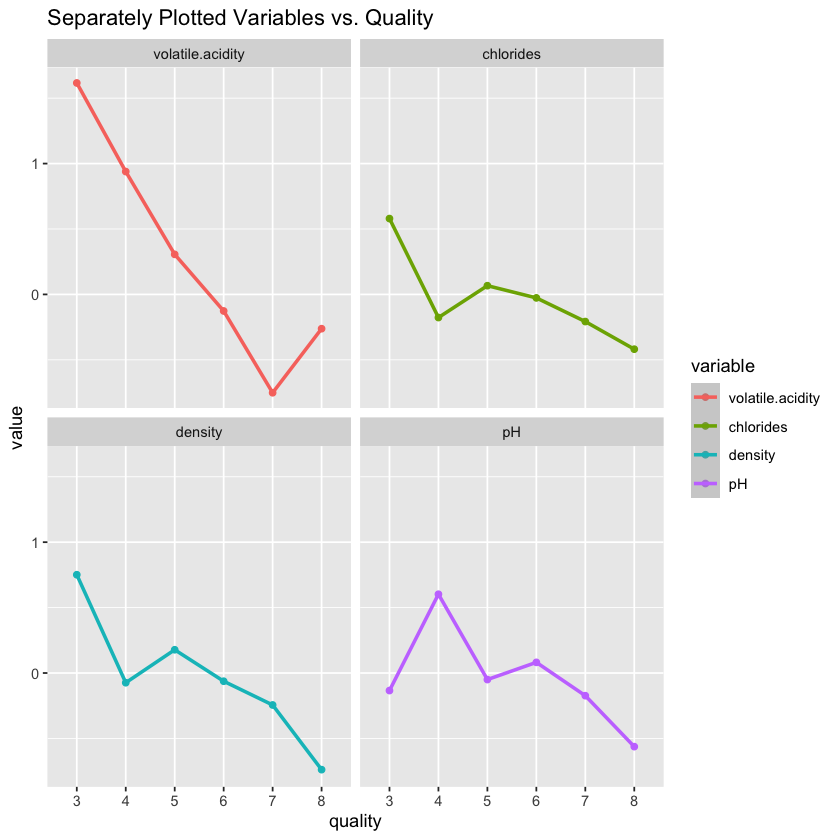

In [66]:
ggplot(mmodelmeans, aes(quality, value, group=variable, col=variable)) + ggtitle ("Separately Plotted Variables vs. Quality")+
  geom_point() + 
  stat_smooth() +
  facet_wrap(~variable)

## Assumptions Testing

### Misclassification Rate

In [67]:
lda.pred = (test$class)

In [68]:
lda.error = mean(default$default != lda.pred)

ERROR: Error in mean(default$default != lda.pred): object 'default' not found


In [69]:
lda.error

ERROR: Error in eval(expr, envir, enclos): object 'lda.error' not found


### Confusion Matrix

In [70]:
LDA_model = lda.cm

ERROR: Error in eval(expr, envir, enclos): object 'lda.cm' not found


In [71]:
LDA_model

ERROR: Error in eval(expr, envir, enclos): object 'LDA_model' not found


## LDA model: Make Predictions on Test Data

In [72]:
predicted <- predict(model, test)
names(predicted)

[1] "class"     "posterior" "x"

### View Predicted Class (First Six Observations)

In [73]:
head(predicted$class)

[1] 6 5 5 6 5 6
Levels: 3 4 5 6 7 8

### View Predicted Posterior Probability (First Six Observations)¶

In [74]:
head(predicted$posterior)

,3,4,5,6,7,8
4,5.447785e-05,0.003475051,0.2565498,0.4301147,0.30296603,0.0068399848
6,1.987033e-03,0.073402627,0.4912910,0.3942343,0.03847096,0.0006141343
7,8.915412e-04,0.031148641,0.4676033,0.4060456,0.08754223,0.0067686941
15,1.416444e-04,0.017983603,0.3067431,0.5451008,0.12954337,0.0004875773
17,4.426605e-04,0.011806595,0.4147467,0.4146365,0.14686400,0.0115036090
18,1.175394e-04,0.013746531,0.2949952,0.5243992,0.16488502,0.0018565266


### View Linear Discriminants (First Six Observations)¶

In [75]:
head(predicted$x)

,LD1,LD2,LD3,LD4
4,1.2974723,0.7632667,0.5639303,0.75481104
6,-0.9630362,-1.2052765,0.4364889,0.67401211
7,-0.2441581,0.1737348,-0.5868537,0.18837569
15,0.4206838,-1.5694830,1.4187161,0.80411739
17,0.3149221,0.9164348,-0.2763403,0.01606496
18,0.6523267,-0.9405094,0.6666388,0.15489907


## Accuracy of the Model

In [77]:
mean(predicted$class==test$quality)

[1] 0.5597668

## Visualize the Results

### Convert Quality to a Factor

In [78]:
wine_wrangled$quality = factor(wine_wrangled$quality, levels = c("3", "4", "5", "6", "7", "8"), ordered = TRUE)
str(wine_wrangled)

'data.frame':	1143 obs. of  5 variables:
 $ volatile.acidity: num  0.939 1.941 1.273 -1.399 0.939 ...
 $ chlorides       : num  -0.231 0.234 0.107 -0.252 -0.231 ...
 $ density         : num  0.5556 0.0361 0.14 0.6595 0.5556 ...
 $ pH              : num  1.27 -0.709 -0.326 -0.964 1.27 ...
 $ quality         : Ord.factor w/ 6 levels "3"<"4"<"5"<"6"<..: 3 3 3 4 3 3 3 5 5 3 ...


### Rebuild Model with 'Quality' as a Factor

In [79]:
set.seed(1)

In [80]:
sample <- sample(c(TRUE, FALSE), nrow(wine_wrangled), replace=TRUE, prob=c(0.7,0.3))
train <- wine_wrangled[sample, ]
test <- wine_wrangled[!sample, ]

In [81]:
LDAmodel <- lda(quality~., data=train)

### Define Data to Plot

In [82]:
lda_plot <- cbind(train, predict(LDAmodel)$x)

### Create Plot

Warning message:
“Duplicated aesthetics after name standardisation: ”


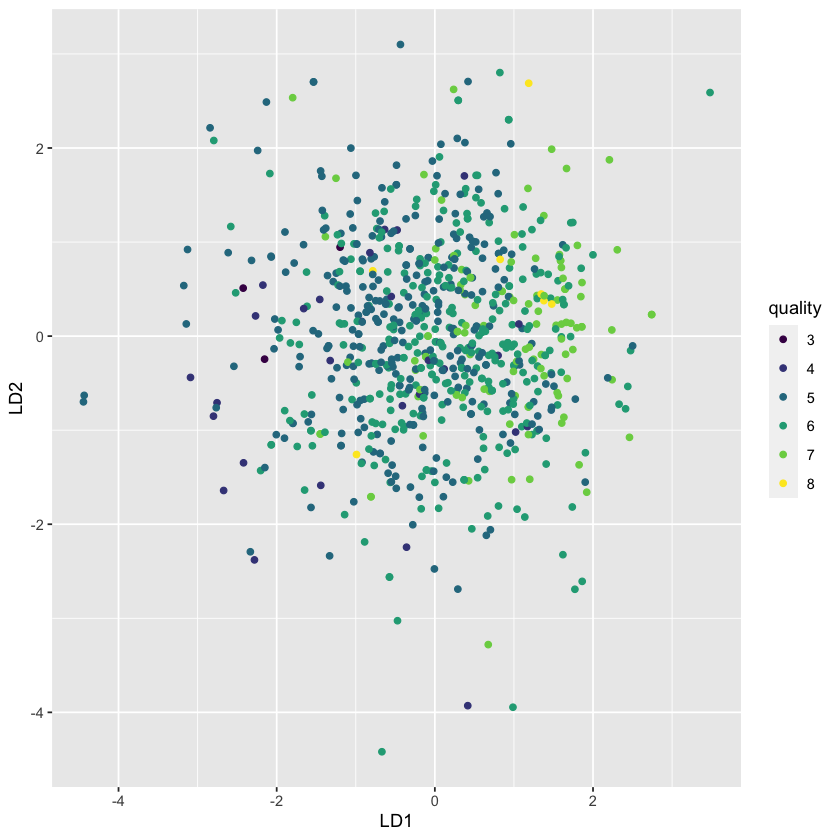

In [83]:
ggplot(lda_plot, aes(LD1, LD2, LD3, LD4)) +
  geom_point(aes(color = quality))